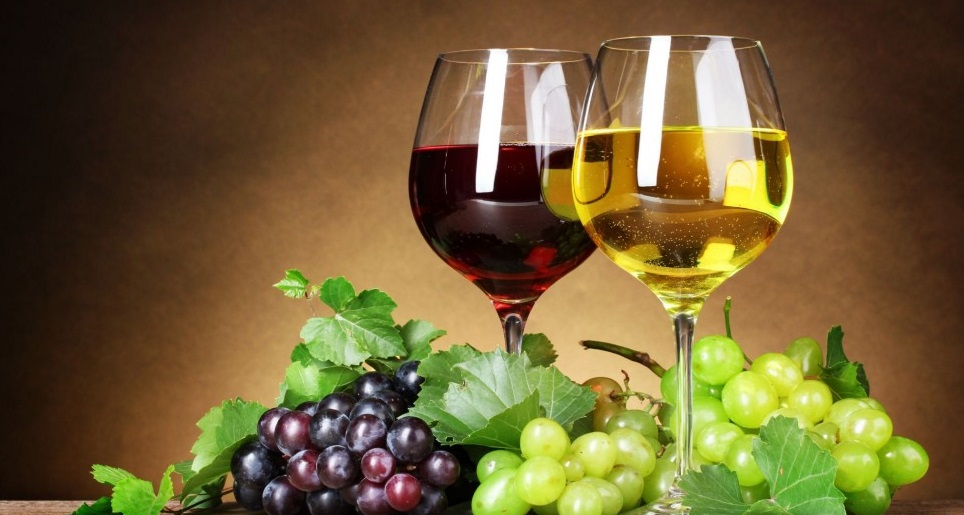

<a name="índice"></a>
# Índice
[Extra Trees Classifier](#etc)<br>
[Multi-layer Perceptron (MLP)](#rna)

# BUSINESS UNDERSTANDING

In [1]:
# Case de dados para CLASSIFICAÇÃO
# Identificar o tipo de vinho de acordo com as características de vinho tinto e branco presente na base de dados

# DATA UNDERSTANDING

In [2]:
# IA -> MACHINE LEARNING
# MODELO SUPERVISIONADO -> MÉTODO CLASSIFICAÇÃO
# Dados disponibilizadas no kaggle para efeito de estudo sobre o tipo de vinho com base nas características
# Obs1: Verificar se todos os atributos são importantes para o modelo

[Wine dataset](https://www.kaggle.com/datasets/dell4010/wine-dataset)

# Title

In [3]:
# Classificação de binhos tinto e branco

# Head

In [4]:
# estudando machine learning
# by geanclm em 20/02/2022 at 11:47h
# update by geanclm on 24/10/2023

# Local files

In [5]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 9241-82D4

 Pasta de C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning

06/12/2023  11:49    <DIR>          .
29/11/2023  09:13    <DIR>          ..
24/10/2023  09:36                68 .gitattributes
29/11/2023  09:27    <DIR>          .ipynb_checkpoints
06/12/2023  11:49         1.106.601 CLASSIFICA€ÇO_Wine_Kaggle_csv.ipynb
24/10/2023  09:36             1.091 LICENSE
24/10/2023  09:36                50 README.md
01/11/2023  13:01           131.951 Vinho-Tinto-e-Vinho-Branco.jpg
07/11/2023  16:35         9.618.537 wine_classifier_etc_2023-11-07.joblib
24/10/2023  09:36           384.016 wine_dataset.csv
               7 arquivo(s)     11.242.314 bytes
               3 pasta(s)   884.238.778.368 bytes dispon¡veis


# Library installation

In [6]:
# !pip install -U imbalanced-learn
# !pip install imblearn
# !pip install pyod
# !pip install tensorflow

# Import libs

In [173]:
# para verificar dados relativos a versão utilizada
import sys
import sklearn

# função utilizada para registrar data e hora no nome do modelo salvo
from datetime import datetime

# principais bibliotecas para lidar com dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# função para gerar o MODELO de machine learning
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# trabalhar com os dados com rede neural
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

# Validação cruzada
from sklearn.model_selection import GridSearchCV

# função para MÉTRICA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

# função para VALIDAÇÃO do modelo
from sklearn.model_selection import train_test_split as tts

# balancemaneto dos dados em relação ao MAIOR valor de y
# from imblearn import under_sampling, over_sampling # verificar se realmente é necessária essa linha - reduntante!!!
from imblearn.over_sampling import SMOTE

# balancemaneto dos dados em relação ao MENOR valor de y
from imblearn.under_sampling import RandomUnderSampler

# Padronizar os dados
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

# biblioteca para persistir o modelo
import joblib

# identificar outliers
from pyod.models.knn import KNN

# Gráfico da Árvore
from sklearn.tree import plot_tree

# Configuração da Validação Cruzada
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

# Combinação dos modelos
from sklearn.ensemble import VotingClassifier

In [8]:
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [9]:
print(sklearn.__version__)

1.3.0


# Load data

In [10]:
df = pd.read_csv(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_dataset.csv')

# Exploratory Analysis

In [11]:
df.sample(15).T

4734     1024    35      3799    1602    3295  \
fixed_acidity             6.6      7.7     7.8     6.4     7.2     8.5   
volatile_acidity         0.39     0.58   0.645    0.24    0.23    0.32   
citric_acid              0.39     0.01     0.0    0.23    0.32    0.36   
residual_sugar           11.9      1.8     5.5     7.3     8.5    14.9   
chlorides               0.057    0.088   0.086   0.069   0.058   0.041   
free_sulfur_dioxide      51.0     12.0     5.0    31.0    47.0    47.0   
total_sulfur_dioxide    221.0     18.0    18.0   157.0   186.0   190.0   
density               0.99851  0.99568  0.9986  0.9962  0.9956  0.9982   
pH                       3.26     3.32     3.4    3.25    3.19    3.08   
sulphates                0.51     0.56    0.55    0.53     0.4    0.31   
alcohol                   8.9     10.5     9.6     9.1     9.9    10.0   
quality                     6        7       6       5       6       6   
style                   white      red     red   white   white   white   

                        366     1690    17       1235    2257    2353    13    \
fixed_acidity           12.8     6.1     8.1      6.0     6.6     5.9     7.8   
volatile_acidity       0.615    0.27    0.56     0.33    0.27    0.35    0.61   
citric_acid             0.66    0.43    0.28     0.32    0.25    0.47    0.29   
residual_sugar           5.8     7.5     1.7     12.9     3.1     2.2     1.6   
chlorides              0.083   0.049   0.368    0.054   0.052    0.11   0.114   
free_sulfur_dioxide      7.0    65.0    16.0      6.0    41.0    14.0     9.0   
total_sulfur_dioxide    42.0   243.0    56.0    113.0   188.0   138.0    29.0   
density               1.0022  0.9957  0.9968  0.99572  0.9915  0.9932  0.9974   
pH                      3.07    3.12    3.11      3.3    3.24    3.09    3.26   
sulphates               0.73    0.47    1.28     0.56     0.4     0.5    1.56   
alcohol                 10.0     9.0     9.3     11.5    11.3     9.1     9.1   
quality                    7       5       5        4       5       5       5   
style                    red   white     red      red   white   white     red   

                        352     4205  
fixed_acidity            7.7     7.2  
volatile_acidity       0.665     0.2  
citric_acid              0.0    0.36  
residual_sugar           2.4     2.5  
chlorides               0.09   0.028  
free_sulfur_dioxide      8.0    22.0  
total_sulfur_dioxide    19.0   157.0  
density               0.9974  0.9938  
pH                      3.27    3.48  
sulphates               0.73    0.49  
alcohol                  9.3    10.6  
quality                    5       6  
style                    red   white

In [12]:
# filtrar dado específico do data frame
df.loc[0:4,'style']

0    red
1    red
2    red
3    red
4    red
Name: style, dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [14]:
df.dtypes[df.dtypes.values == 'object'].index

Index(['style'], dtype='object')

In [15]:
df.shape

(6497, 13)

In [16]:
df.describe().T

count        mean        std      min       25%  \
fixed_acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile_acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric_acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual_sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free_sulfur_dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total_sulfur_dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed_acidity           7.00000    7.70000   15.90000  
volatile_acidity        0.29000    0.40000    1.58000  
citric_acid             0.31000    0.39000    1.66000  
residual_sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free_sulfur_dioxide    29.00000   41.00000  289.00000  
total_sulfur_dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

In [17]:
# verificar a existência de dados nulos
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [18]:
# Em caso de haver dados nulos analisar melhor estratégia para a situação pontual

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            DATA PREPARATION
        </b>
    <br/>&nbsp;
</center>

In [19]:
df['style'] = df['style'].replace('red', 0) # vinho tinto
df['style'] = df['style'].replace('white', 1) # vinho branco

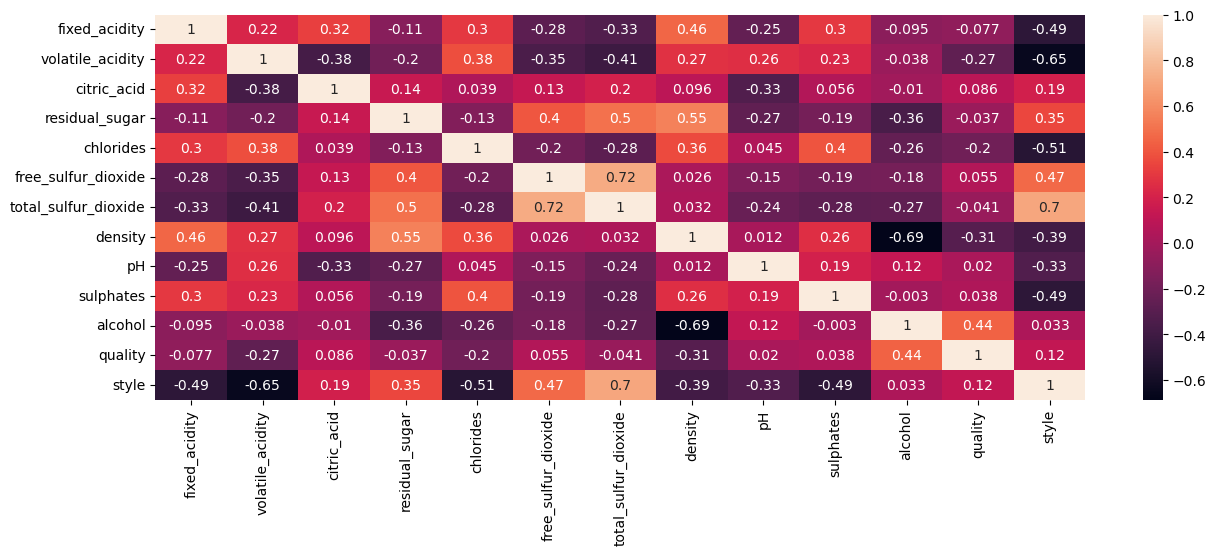

In [20]:
# Analisar a correlação entre as variáveis da base de dados
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True);

In [21]:
# 1 - VERIFICAR NECESSIDADE DE APLICAR O GET DUMMIES para cada base de dados
# df_d = pd.get_dummies(df)
# df_d.sample(5)

# DATA VISUALIZATION

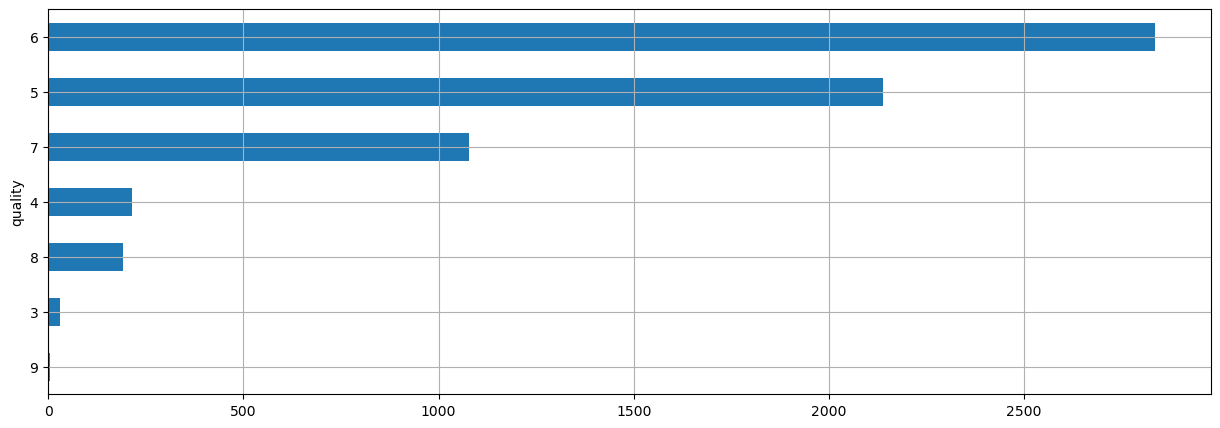

In [22]:
# wine ranking
plt.figure(figsize=(15,5))
df['quality'].value_counts(ascending=True).plot.barh()
plt.grid()
plt.show();

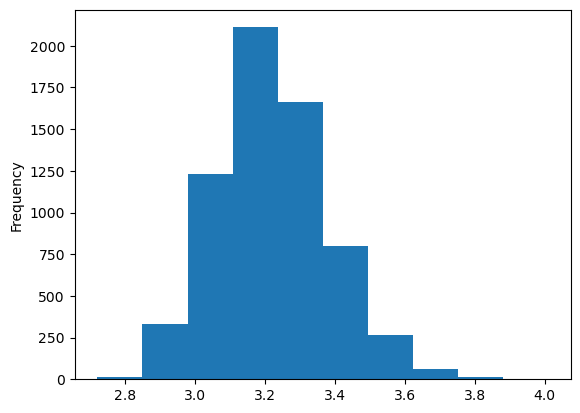

In [23]:
# frequência geral de pH dos vinhos
df['pH'].plot.hist();

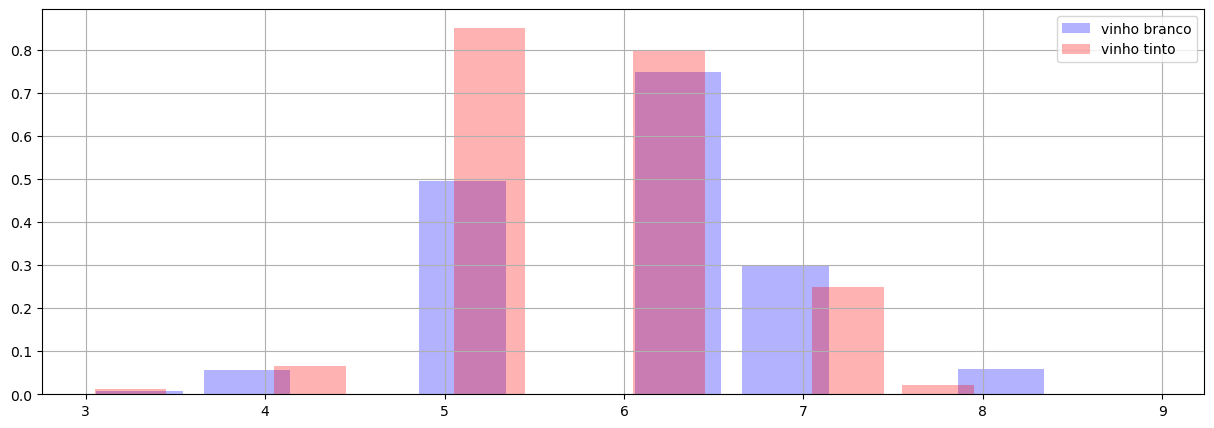

In [24]:
# ANALISANDO a qualidade geral dos vinhos em relação a característica tinto e branco
# (df.loc[df['style']== 1]).hist(figsize=(15,5));
# df['quality'].hist()

# min = df['quality'].min()
# max = df['quality'].max()
# bins = np.linspace(min,max, 6)

plt.figure(figsize=(15,5))
(df['quality'].loc[df['style']== 1]).hist(rwidth=0.80, color='b', alpha=.3, density=True, label='vinho branco') # vinhos branco
(df['quality'].loc[df['style']== 0]).hist(rwidth=0.80, color='r', alpha=.3, density=True, label='vinho tinto') # vinhos tinto;
plt.legend();

# Análise dos outliers (df)

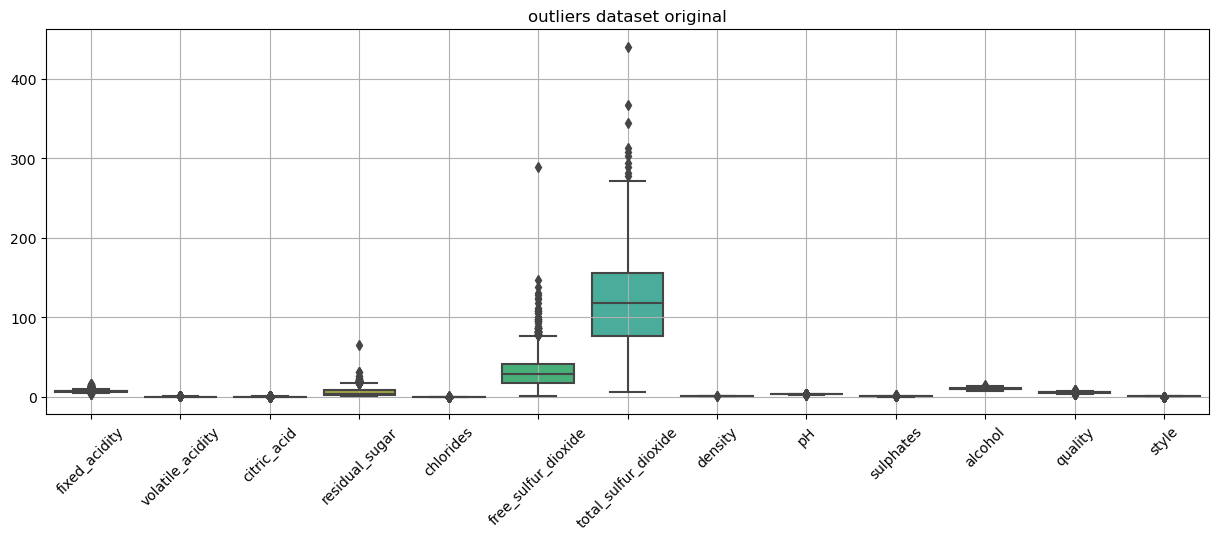

In [25]:
# Outliers data frame df
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('outliers dataset original')
plt.grid()
plt.show();

In [26]:
# LIMITE INFERIOR E SUPERIOR DO BOX PLOT DE VARIÁVEL ESPECÍFICA
var = 'total_sulfur_dioxide'
q1 = df[var].quantile(0.25)
q2 = df[var].quantile(0.5)
q3 = df[var].quantile(0.75)
amplitude = q3 - q1
limite_inferior = q1 - (1.5 * amplitude)
limite_superior = q3 + (1.5 * amplitude)
menor_valor_serie = df[var].min()
maior_valor_serie = df[var].max()
quant_dados_ALS = df.loc[df[var] > limite_superior].count()[0] # quantidade de dados acima do limite superior
quant_dados_BLI = df.loc[df[var] < limite_inferior].count()[0] # quantidade de dados abaixo do limite inferior
perc_ALS = (((df.loc[df[var] > limite_superior]).count()[0] / df[var].count())) * 100
perc_BLI = (((df.loc[df[var] < limite_inferior]).count()[0] / df[var].count())) * 100
box_splot = {
        'perc_BLI':[perc_BLI],
        'quant_dados_BLS':[quant_dados_BLI],
        'menor_valor_serie':[menor_valor_serie],
        'LI_box_splot':[limite_inferior],
        'q1':[q1],
        'q2':[q2],
        'q3':[q3],
        'LS_box_splot':[limite_superior],
        'maior_valor_serie':[maior_valor_serie],
        'quant_dados_ALS':[quant_dados_ALS],
        'perc_ALS':[perc_ALS]        
}
df_box_splot = pd.DataFrame(box_splot)
df_box_splot

perc_BLI  quant_dados_BLS  menor_valor_serie  LI_box_splot    q1     q2  \
0       0.0                0                6.0         -41.5  77.0  118.0   

      q3  LS_box_splot  maior_valor_serie  quant_dados_ALS  perc_ALS  
0  156.0         274.5              440.0               10  0.153917

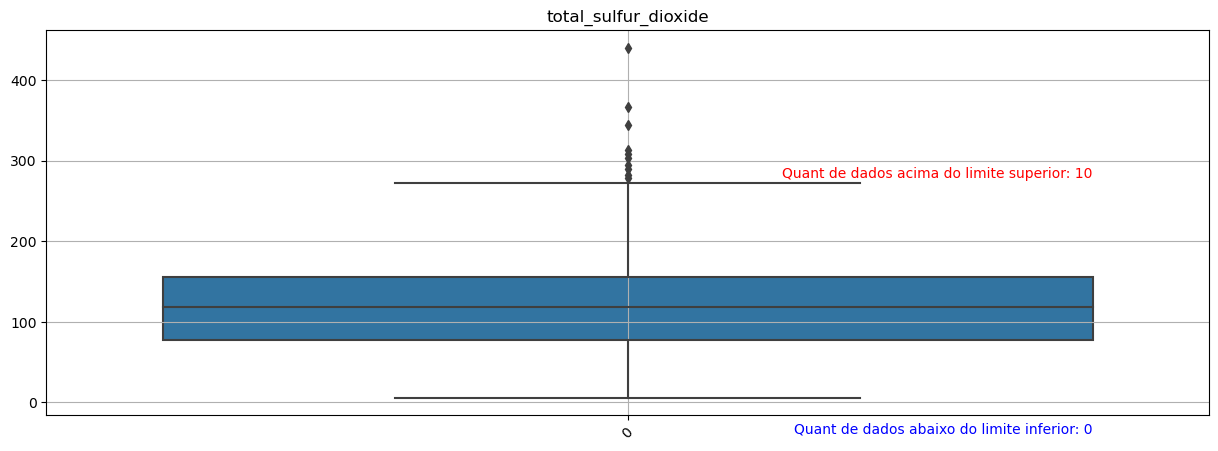

In [27]:
# Outliers var
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df[var])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(var)
plt.text(0.4, limite_superior, f"Quant de dados acima do limite superior: {quant_dados_ALS}", ha='right',
         va='bottom', fontsize=10, color='red')
plt.text(0.4, limite_inferior, f"Quant de dados abaixo do limite inferior: {quant_dados_BLI}", ha='right',
         va='bottom', fontsize=10, color='blue')
plt.grid()
plt.show();

In [28]:
# Outliers acima do limite superior boxsplot var
df.loc[df[var] > limite_superior]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1079            7.9              0.30         0.68            8.30      0.050   
1081            7.9              0.30         0.68            8.30      0.050   
1924            7.5              0.27         0.31            5.80      0.057   
3016            8.6              0.55         0.35           15.55      0.057   
3530            7.1              0.49         0.22            2.00      0.047   
3726            9.1              0.33         0.38            1.70      0.062   
3977            9.4              0.23         0.56           16.45      0.063   
4253            6.9              0.40         0.22            5.95      0.081   
4751            7.6              0.25         1.23            4.60      0.035   
6344            6.1              0.26         0.25            2.90      0.047   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
1079                 37.5                 278.0  0.99316  3.01       0.51   
1081                 37.5                 289.0  0.99316  3.01       0.51   
1924                131.0                 313.0  0.99460  3.18       0.59   
3016                 35.5                 366.5  1.00010  3.04       0.63   
3530                146.5                 307.5  0.99240  3.24       0.37   
3726                 50.5                 344.0  0.99580  3.10       0.70   
3977                 52.5                 282.0  1.00098  3.10       0.51   
4253                 76.0                 303.0  0.99705  3.40       0.57   
4751                 51.0                 294.0  0.99018  3.03       0.43   
6344                289.0                 440.0  0.99314  3.44       0.64   

      alcohol  quality  style  
1079     12.3        7      0  
1081     12.3        7      0  
1924     10.5        5      1  
3016     11.0        3      1  
3530     11.0        3      1  
3726      9.5        5      1  
3977      9.3        5      1  
4253      9.4        5      1  
4751     13.1        6      1  
6344     10.5        3      1

In [29]:
# Instanciando o objeto KNN para detectar os outlers df
# Obs: uma das formas de tratar outliers mas que não é a mais adequada ou a certa, pois depende do contexto dos dados
detector = KNN()

# Treinar o detector de OUTLIERS
detector.fit(df)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [30]:
# 0 -> NÃO é outlier
# 1 -> outlier
previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([5847,  650], dtype=int64))

In [32]:
# Cálculo da distância realizado para identificação do outlier
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([2.12212299, 2.71635787, 2.18040046, ..., 2.34466423, 3.08154044,
       2.51754346])

In [33]:
# Lista outliers
outliers = []
for i in range(len(previsoes)):    
    if previsoes[i] == 1:
        outliers.append(i)

# Filtrar as linhas outlier df
df_outliers = df.iloc[outliers,:]

In [34]:
# salvar versão df sem os outliers
df_sem_outliers = df.loc[~df.index.isin(outliers)]

In [35]:
# df_sem_outliers

In [36]:
df.shape, df_sem_outliers.shape

((6497, 13), (5847, 13))

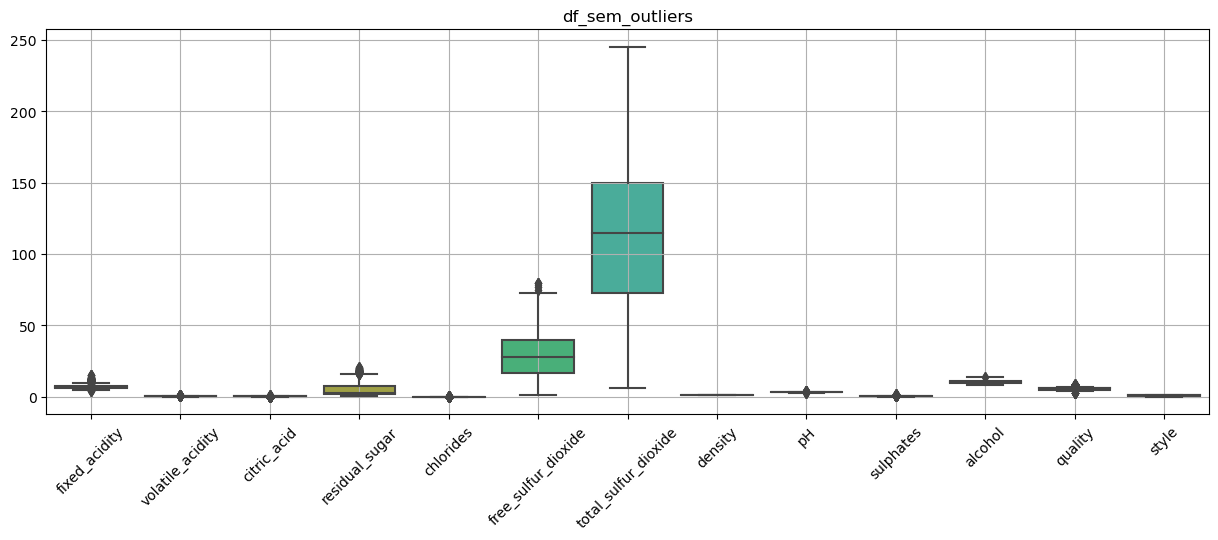

In [37]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_sem_outliers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('df_sem_outliers')
plt.grid()
plt.show();

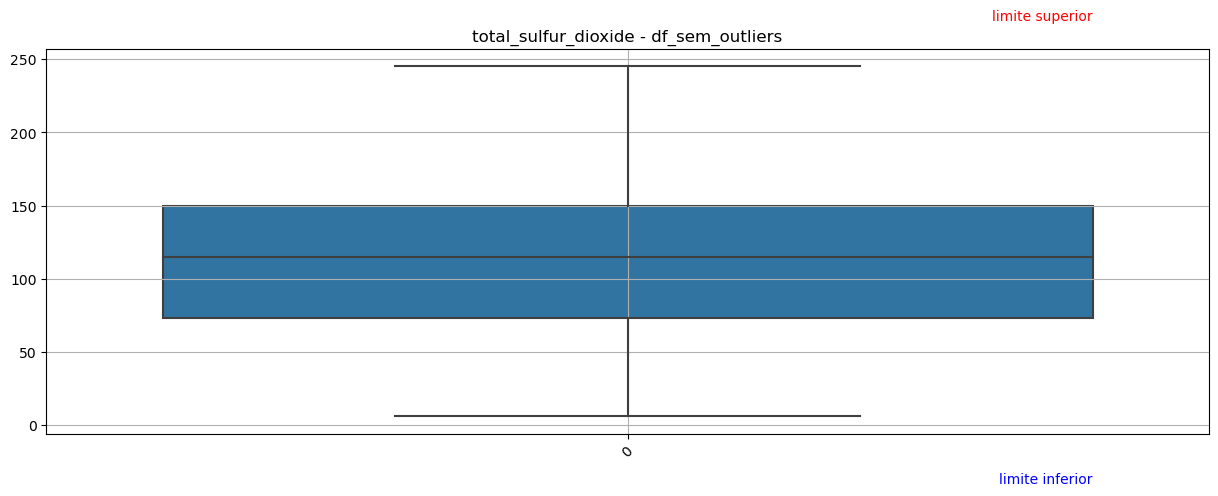

In [38]:
# Análise variável após tratamento dos outliers
var = 'total_sulfur_dioxide'
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_sem_outliers[var])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(f'{var} - df_sem_outliers')
plt.text(0.4, limite_superior, f"limite superior", ha='right', va='bottom', fontsize=10, color='red')
plt.text(0.4, limite_inferior, f"limite inferior", ha='right', va='bottom', fontsize=10, color='blue')
plt.grid()
plt.show();

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            MODELING
        </b>
    <br/>&nbsp;
</center>

In [39]:
# dividir em df MODEL para treinar e testar o modelo e df VALIDAÇÃO para fins de simulando o mundo real
df_model, df_validation = tts(df_sem_outliers, test_size=0.10)

In [40]:
# Divisão dos dados em X e y a partir do df_tr (corresponde a 70% da base utilizada para treinar o modelo)
X = df_model.drop('style', axis = 1)
y = df_model['style']
X.shape, y.shape

((4385, 12), (4385,))

In [41]:
# Variável de validação final para o modelo gerado (corresponde a 30% dos dados simulando mundo real)
X_val = df_validation.drop('style', axis = 1)
y_val = df_validation['style']

In [42]:
df.groupby('style').size()[0], df.groupby('style').size()[1]

(1599, 4898)

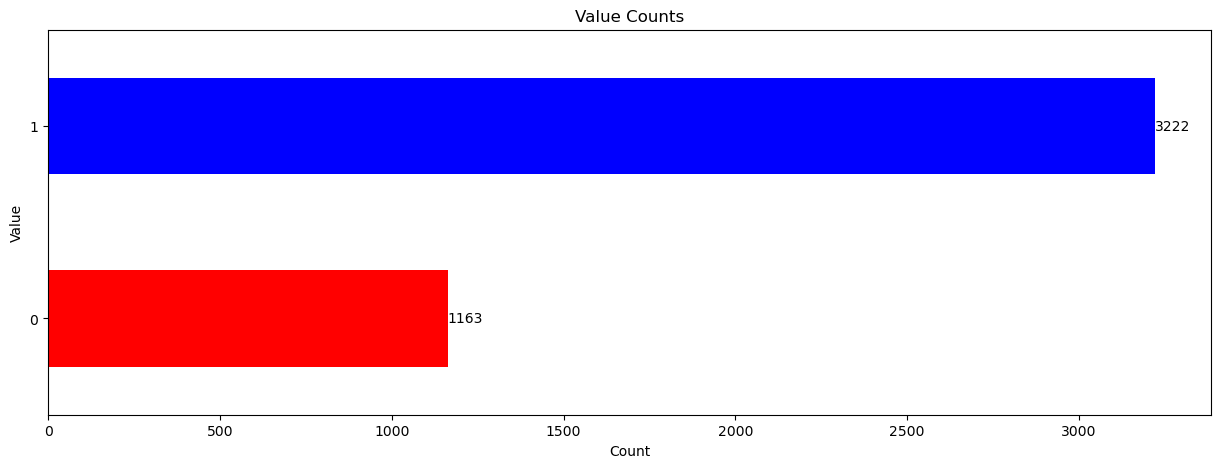

In [43]:
plt.figure(figsize=(15,5))
ax = y.value_counts(ascending=True).plot(kind ='barh', color = ['red','blue'])
ax.set_xlabel('Count')
ax.set_ylabel('Value')
ax.set_title('Value Counts')
ax.bar_label(ax.containers[0], label_type='edge');

In [44]:
# quantidade de 0 e 1 na variável y do df
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1163, 3222], dtype=int64))

In [45]:
percentual_0 = np.bincount(y)[0] / len(y) * 100
percentual_1 = np.bincount(y)[1] / len(y) * 100
percentual_0, percentual_1

(26.522234891676167, 73.47776510832384)

# Data balancing

In [46]:
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!

# balancemaneto dos dados com a geração de dados aleatórios na base minoritária de y
smote_ball = SMOTE()
X_bal, y_bal = smote_ball.fit_resample(X, y)

# balancemaneto dos dados com a remoção de dados da base majoritária de y
# rus = RandomUnderSampler()
# X_bal, y_bal = rus.fit_resample(X, y)

In [47]:
# y_bal.value_counts()

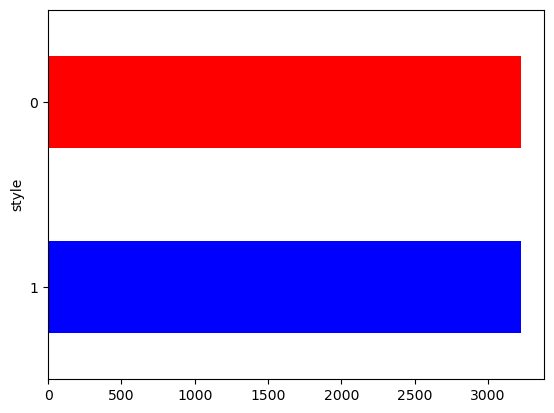

In [48]:
# variável y, balanceada, utilizada para TREINAR o modelo
y_bal.value_counts(ascending=True).plot(kind = 'barh', color = ['blue', 'red']);

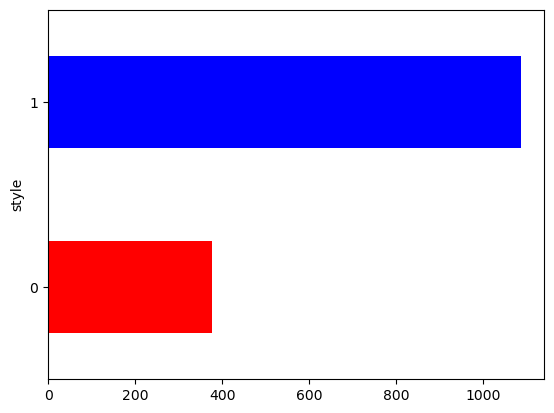

In [49]:
# Variável y, base de validação, utilizada para aplicar situações novas ao modelo já treinado e simulando vida real
y_val.value_counts(ascending=True).plot(kind = 'barh', color = ['red','blue']);

# Standardization

In [50]:
# Padronizar X_bal do X do df_tr
obj_padronizado = StandardScaler().fit(X_bal)
X_bal_padronizado = obj_padronizado.transform(X_bal)
X_bal_padronizado = pd.DataFrame(X_bal_padronizado)
X_bal_padronizado.columns = list(X_bal.columns)

In [51]:
X_bal_padronizado.tail()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
6439      -0.775824          1.517170    -1.840690       -0.655581  -0.280485   
6440       2.234073         -0.705564     1.007394       -0.270994  -0.083560   
6441      -0.496538          0.546505    -0.165984       -0.452610  -0.449040   
6442      -0.442696          1.751792    -1.589015       -0.615390   0.224883   
6443       0.904900         -0.115805     0.676949       -0.513194   0.024328   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
6439            -1.158789             -1.367441 -1.306168  1.409996   
6440            -0.295911             -0.714366  0.737665 -0.738465   
6441            -0.506277             -0.328113 -0.440313  1.229145   
6442             0.538618             -0.788741  0.234363  1.057991   
6443            -0.823705             -1.083970 -0.135664  0.150441   

      sulphates   alcohol  quality  
6439  -0.232906  2.149614  0.35163  
6440  -0.183628 -0.697682 -0.85044  
6441   0.615722  1.652636  0.35163  
6442   0.531739  0.026920 -0.85044  
6443   1.157396  1.937754  1.55370

In [52]:
# df_padronizado.describe().T

In [53]:
# plt.figure(figsize=(15,5))
# ax = sns.boxplot(data=df_padronizado)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [54]:
# Padronizar X_val (origem no df_ts correspondente a 30% dos dados do df para teste do modelo)
obj_padronizado = StandardScaler().fit(X_val)
X_val_padronizado = obj_padronizado.transform(X_val)
X_val_padronizado = pd.DataFrame(X_val_padronizado)
X_val_padronizado.columns = list(X_val.columns)
X_val_padronizado.tail()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1457      -1.112750         -0.334533     2.377815        0.910427  -0.528160   
1458       0.060480          0.372325    -0.427233        0.092350  -1.328445   
1459      -0.252381         -0.570152     0.133777       -0.075748  -0.493365   
1460       0.529772         -0.157818    -0.707737        1.851776  -0.215005   
1461       0.138696         -0.923581    -0.357106       -0.837792  -0.215005   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
1457            -0.207664              0.899548  0.664121  2.650939   
1458            -0.207664             -0.395462 -1.683801 -2.415058   
1459             0.854875              0.937085 -0.343571 -0.190962   
1460             1.042382              1.894267  1.644941  1.477111   
1461            -0.207664             -0.113938 -0.175622  1.786013   

      sulphates   alcohol   quality  
1457   0.118761  0.193047 -0.994626  
1458   0.049970  2.234222  1.354555  
1459   0.393924  0.022949  0.179965  
1460   0.393924 -0.487345 -0.994626  
1461   0.875460  0.022949  0.179965

# Normalization

In [55]:
# obj_normalizado = MinMaxScaler().fit(X_bal)
# df_normalizado = obj_normalizado.transform(X_bal)
# df_normalizado = pd.DataFrame(df_normalizado)
# df_normalizado.columns = list(X_bal.columns)
# df_normalizado.head()

In [56]:
# df_normalizado.describe().T

In [57]:
# plt.figure(figsize=(15,5))
# ax = sns.boxplot(data=df_normalizado)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

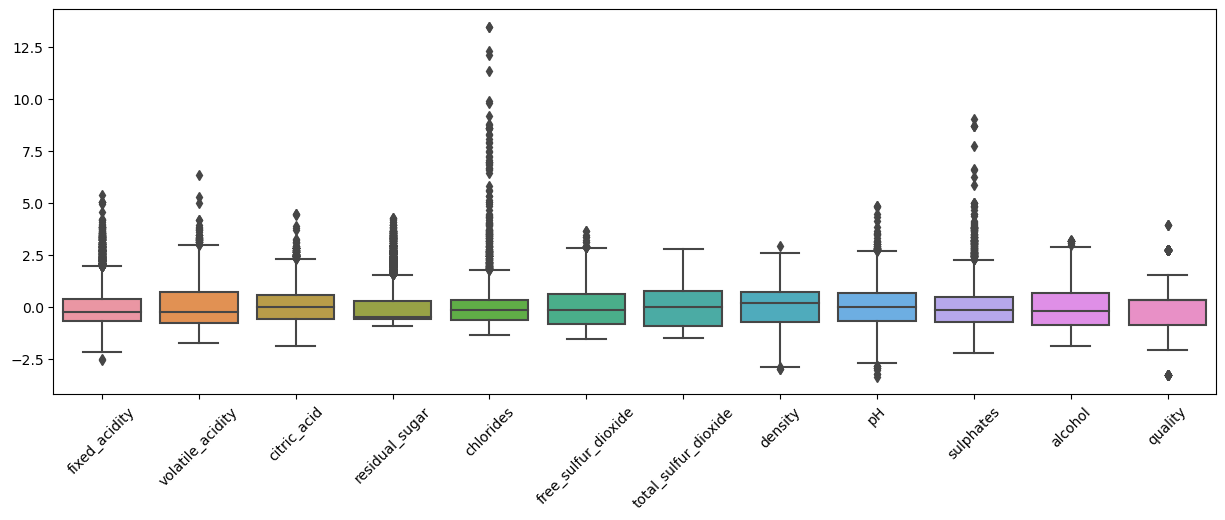

In [58]:
# Analisar os outliers
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=X_bal_padronizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show();

# VALIDAÇÃO HOLDOUT
# Separar df_model - balanceado e padronizado - em X_tr, X_ts, y_tr, y_ts

In [59]:
# Separar df_model - balanceado e padronizado - em X_tr, X_ts, y_tr, y_ts
PREDICTOR = X_bal_padronizado
TARGET = y_bal
X_tr, X_ts, y_tr, y_ts = tts(PREDICTOR,TARGET, test_size= 0.3)

In [60]:
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape, y_tr.value_counts()[0], y_tr.value_counts()[1]

((4510, 12), (1934, 12), (4510,), (1934,), 2257, 2253)

<a name="etc"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Extra Trees Classifier
        </b>
    <br/>&nbsp;
</center>

<div style="overflow: auto;">
    <div style="float: left;">
        <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html">
            Consultar documentação "ExtraTreesClassifier"
        </a>
    </div>
    <div style="float: right;">
        <a href="#índice">
            Índice deste notebook
        </a>
    </div>
</div>

In [61]:
# Treinar o modelo
etc = ExtraTreesClassifier(n_estimators=500, max_depth=10, n_jobs=-1)
etc.fit(X_tr, y_tr)
etc_y_pred = etc.predict(X_ts)

In [62]:
# PROPENSÃO respectiva, nas colunas, da variável resposta ser 0 e 1
# etc.predict_proba(X_ts)

In [63]:
# pd.DataFrame(etc.predict_proba(X_ts), columns=['Propensão 0', 'Propensão 1']).head()

# EVALUATION

In [64]:
# Max e Min
etc_y_pred.min(), etc_y_pred.max()

(0, 1)

In [65]:
# Curva ROC
roc_auc_score(y_ts, etc_y_pred)

0.9958591999657787

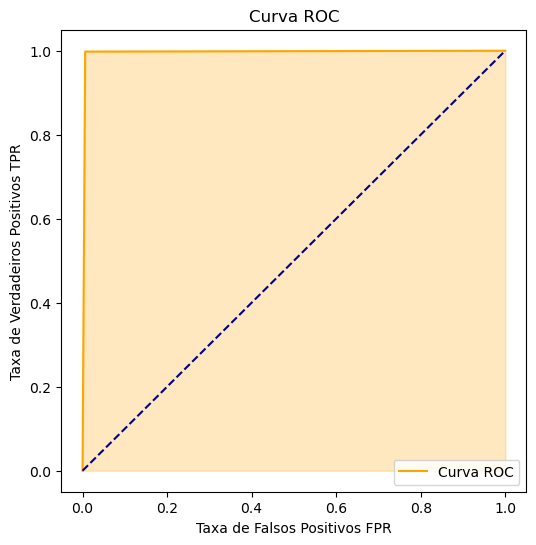

AUC: 1.00


In [66]:
# Calculando a curva ROC
# A curva ROC é um gráfico que representa a taxa de verdadeiros positivos (TPR)
# em função da taxa de falsos positivos (FPR) para diferentes valores de limiar de classificação.

fpr, tpr, thresholds = roc_curve(y_ts, etc_y_pred)

# Plotando a curva ROC
color = 'orange'
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color=color, label='Curva ROC')
plt.fill_between(fpr, tpr, color=color, alpha=.25)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos FPR')
plt.ylabel('Taxa de Verdadeiros Positivos TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Calculando a área sob a curva (AUC)
# A área sob a curva ROC (AUC-ROC) é uma métrica resumida que quantifica o desempenho global do modelo.
# Um valor de AUC-ROC próximo a 1 indica um bom modelo, enquanto um valor próximo a 0,5 indica um desempenho aleatório.
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.2f}')

In [67]:
# SCORE
etc_acuracia = etc.score(X_ts, y_ts)
print("score AUTO:", etc_acuracia)

score AUTO: 0.9958634953464323


In [68]:
# ACURÁCIA
etc_acuracia = accuracy_score(y_ts, etc_y_pred)
print("accuracy_score AUTO:", etc_acuracia)

accuracy_score AUTO: 0.9958634953464323


In [69]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
etc_recall = recall_score(y_ts, etc_y_pred)
print("etc_recall:", etc_recall)

etc_recall: 0.9979360165118679


In [70]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
etc_precision = precision_score(y_ts, etc_y_pred)
print("precision_score:", etc_precision)

precision_score: 0.9938335046248715


In [71]:
# MATRIZ CONFUSÃO
etc_confusion_matrix = confusion_matrix(y_ts, etc_y_pred)
etc_confusion_matrix

array([[959,   6],
       [  2, 967]], dtype=int64)

|                     |  PRED = 0          |           PRED = 1   |
|-                    |--------------------|----------------------|
| *REAL = 0*          |      VN            |             FP       |
| *REAL = 1*          |      FN            |             VP       |

In [72]:
# CÁLCULO MANUAL DA ACURÁCIA
# com base nos valores da matriz confusão
etc_acuracia_manual = (etc_confusion_matrix[0][0] + etc_confusion_matrix[1][1])/(etc_confusion_matrix[0][0] + etc_confusion_matrix[0][1] + etc_confusion_matrix[1][0] + etc_confusion_matrix[1][1])
print(f'Acurácia MANUAL:, {etc_acuracia_manual}')

Acurácia MANUAL:, 0.9958634953464323


In [73]:
# print(classification_report(y_ts, etc_y_pred))

In [74]:
etc_f1_score = f1_score(y_ts, etc_y_pred)
etc_f1_score

0.995880535530381

In [75]:
# X_ts[400:410].T
X_val_padronizado[400:410].T

400       401       402       403       404  \
fixed_acidity         0.295126 -1.503826  1.390141  0.295126 -0.721673   
volatile_acidity     -0.805772  2.227829  1.668232  0.843564 -0.982486   
citric_acid           0.484408 -0.918116 -1.970009  0.063651 -0.006475   
residual_sugar       -0.546422 -0.792966 -0.703313  0.439753 -0.187813   
chlorides            -0.354185  3.716828  3.194903 -1.050085 -0.493365   
free_sulfur_dioxide   0.042345 -1.395208 -0.145162 -0.957692  0.479861   
total_sulfur_dioxide  1.293682 -0.920974 -0.395462  0.355269  0.111281   
density              -0.142033 -0.192417  1.302326 -0.914596 -0.907878   
pH                    1.415330  2.403818 -0.438083  0.117941  0.056160   
sulphates            -0.637939  0.531506  1.150623 -0.569148 -0.706729   
alcohol               0.193047  0.363145 -0.997638  1.638880  0.618292   
quality               1.354555 -0.994626 -0.994626  1.354555  0.179965   

                           405       406       407       408       409  
fixed_acidity         2.094079  1.859433  0.216911 -0.017735  0.999065  
volatile_acidity      1.373708  0.431230  1.079184  0.666850 -0.098913  
citric_acid          -0.497359  0.344156  0.694786 -1.198621  0.274029  
residual_sugar       -0.680900 -0.613661 -0.613661 -0.680900  2.210385  
chlorides             1.733514  1.281179  1.141999  0.828844 -0.458570  
free_sulfur_dioxide  -1.082697 -1.207701 -1.332706 -1.207701  1.104885  
total_sulfur_dioxide -0.414231 -1.652937 -1.371413 -1.559095  1.481365  
density               0.596941  1.120941  0.899249  0.526403  1.235146  
pH                   -1.179449  0.056160  2.156696  0.365062 -0.932327  
sulphates             2.526440  0.187551  0.531506 -0.156403 -1.532219  
alcohol              -0.402296 -0.062100 -0.062100 -0.572393 -0.487345  
quality              -0.994626 -0.994626  0.179965  0.179965  0.179965

# Testar o modelo com dados da base df_validation

In [76]:
# segmento da base y_ts que serve para validar o modelo
# selection_y_ts = list(y_ts[400:410].values)
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print (validation, end=' ')

In [77]:
len(validation)

1462

In [78]:
# aplicação do modelo para predizer resultados com base na base treino e modelo gerado
prediction = list(etc.predict(X_val_padronizado[start:end]))
# prediction = list(etc.predict(X_ts[400:410]))
# print(prediction, end=' ')

In [79]:
len(prediction)

1462

In [80]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    display(dfp.prediction.value_counts())
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

1462 registros lidos
45 tipo(s) de vinho(s) NÃO previstos corretamente!


prediction
0    40
1     5
Name: count, dtype: int64

seq  validation  prediction
40  1301           1           0
41  1333           1           0
42  1406           1           0
43  1417           1           0
44  1442           1           0

In [81]:
# MATRIZ CONFUSÃO - df Validação
etc_y_pred_val = etc.predict(X_val_padronizado)
confusion_matrix(y_val, etc_y_pred_val)

array([[ 371,    5],
       [  40, 1046]], dtype=int64)

# VISUAL

In [82]:
# PROPENSÃO (NÃO É probabilidade)
pred = etc.predict_proba(X_ts)[:,1]

In [83]:
pred.min(), pred.max()

(0.0034198809082856886, 0.9991844837458365)

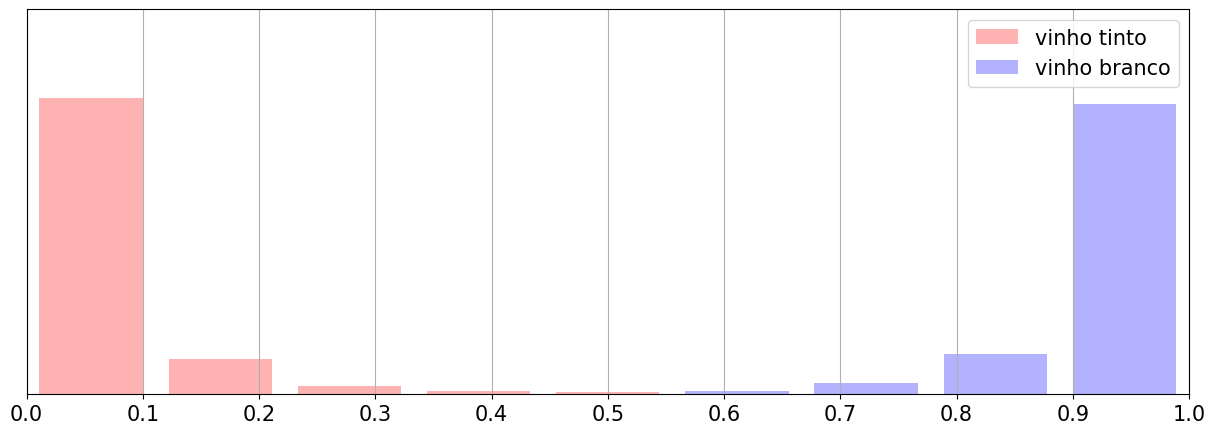

In [84]:
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins=np.linspace(0,1,10), density=True, color='r', alpha=.3, rwidth=.8, label='vinho tinto')
plt.hist(pred[y_ts==1], bins=np.linspace(0,1,10), density=True, color='b', alpha=.3, rwidth=.8, label='vinho branco')

plt.xlim(0, 1)
plt.ylim(0, 10)

plt.xticks(np.arange(0,1.1,0.1), fontsize=15)
plt.yticks([])
plt.legend(fontsize=15)
plt.grid();

# PERSISTENCE

In [85]:
# Salvar modelo em arquivo
# current_date = datetime.today().strftime('%Y-%m-%d')
# name = "wine_classifier_etc_"
# file_name = f'{name}{current_date}.joblib'
# file_path = fr'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\{file_name}'
# joblib.dump(etc, file_path)

In [86]:
# Carregar Modelo Salvo
# model = joblib.load(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_classifier_etc.joblib')
# prediction_persistence = model.predict(X_ts[400:410])
# print(list(prediction_persistence))

# DEPLOYMENT

In [87]:
# Criar tela no Streamlit para aplciar o modelo em situação de produção
# receber arquivo com dados em upload e retornar resultado na tela com tipo de vinho

# INSIGHTS

In [88]:
# 1 - verificar dados outliers
# 2 - a base pode conter a nacionalidade e outras características que podem ajudar na classificação

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            KNeighbors Classifier
        </b>
    <br/>&nbsp;
</center>

[KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

# VALIDAÇÃO CRUZADA

In [89]:
# Treinar o modelo
params = {
    'n_neighbors': np.arange(3, 11, 2)
}
neigh = GridSearchCV(
    KNeighborsClassifier(),
    params,                                    
    cv=10,                                     
    scoring='roc_auc',
#     verbose=5,
)

In [90]:
print(neigh)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 5, 7, 9])},
             scoring='roc_auc')


In [91]:
neigh.fit(X_tr, y_tr)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 5, 7, 9])},
             scoring='roc_auc')

In [92]:
neigh.best_params_, neigh.best_score_, neigh.best_estimator_, neigh.best_index_

({'n_neighbors': 9},
 0.9980619469026548,
 KNeighborsClassifier(n_neighbors=9),
 3)

In [93]:
neigh_y_pred = neigh.predict(X_ts)

In [94]:
# MATRIZ CONFUSÃO
neigh_confusion_matrix = confusion_matrix(y_ts, neigh_y_pred)
neigh_confusion_matrix

array([[959,   6],
       [  7, 962]], dtype=int64)

In [95]:
# ACURÁCIA
neigh_acuracia = accuracy_score(y_ts, neigh_y_pred)
print("neigh_acuracia:", neigh_acuracia)

neigh_acuracia: 0.9932781799379524


In [96]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
neigh_recall = recall_score(y_ts, neigh_y_pred)
print("neigh_recall:", neigh_recall)

neigh_recall: 0.9927760577915377


In [97]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
neigh_precision = precision_score(y_ts, neigh_y_pred)
print("precision_score:", neigh_precision)

precision_score: 0.993801652892562


In [98]:
print(classification_report(y_ts, neigh_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.99      0.99      0.99       969

    accuracy                           0.99      1934
   macro avg       0.99      0.99      0.99      1934
weighted avg       0.99      0.99      0.99      1934



In [99]:
neigh_f1_score = f1_score(y_ts, neigh_y_pred)
neigh_f1_score

0.9932885906040267

# Validação K-FOLD

In [100]:
validacao = KFold(n_splits = 10, shuffle = True)

In [101]:
reglog = cross_validate(neigh, X_bal_padronizado, y_bal, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])

In [102]:
print('     Acurácia:', round(reglog['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(reglog['test_recall'].mean(), 4))
print('     Precisão:', round(reglog['test_precision'].mean(), 4))

     Acurácia: 0.993
Sensibilidade: 0.9913
     Precisão: 0.9946


# Testar o modelo com dados da base df_validation

In [103]:
# segmento da base y_ts que serve para validar o modelo
# selection_y_ts = list(y_ts[400:410].values)
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print (validation, end=' ')

In [104]:
# aplicação do modelo para predizer resultados com base na base treino e modelo gerado
prediction = list(neigh.predict(X_val_padronizado[start:end]))
# prediction = list(etc.predict(X_ts[400:410]))
# print(prediction, end=' ')

In [105]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO identificados corretamente!')
    display(dfp.prediction.value_counts())
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

1462 registros lidos
71 tipo(s) de vinho(s) NÃO identificados corretamente!


prediction
0    66
1     5
Name: count, dtype: int64

seq  validation  prediction
66  1304           1           0
67  1391           1           0
68  1417           1           0
69  1442           1           0
70  1461           1           0

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Decision Tree Classifier
        </b>
    <br/>&nbsp;
</center>

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

# VALIDAÇÃO CRUZADA

In [106]:
params = {
    'max_leaf_nodes': np.power(2, (np.arange(1, 12, 1))),
    'criterion': ['gini','entropy']
}
grid = GridSearchCV(
    DecisionTreeClassifier(),
    params,                                    
    cv=10,                                     
    scoring='roc_auc',
    verbose=5,
)

In [107]:
print(grid)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048],
      dtype=int32)},
             scoring='roc_auc', verbose=5)


In [108]:
# Treinar o modelo
# dtc = DecisionTreeClassifier()
# dtc.fit(X_tr, y_tr)
grid.fit(X_tr, y_tr)

Fitting 10 folds for each of 22 candidates, totalling 220 fits
[CV 1/10] END .criterion=gini, max_leaf_nodes=2;, score=0.922 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=2;, score=0.918 total time=   0.0s
[CV 3/10] END .criterion=gini, max_leaf_nodes=2;, score=0.942 total time=   0.0s
[CV 4/10] END .criterion=gini, max_leaf_nodes=2;, score=0.922 total time=   0.0s
[CV 5/10] END .criterion=gini, max_leaf_nodes=2;, score=0.913 total time=   0.0s
[CV 6/10] END .criterion=gini, max_leaf_nodes=2;, score=0.914 total time=   0.0s
[CV 7/10] END .criterion=gini, max_leaf_nodes=2;, score=0.914 total time=   0.0s
[CV 8/10] END .criterion=gini, max_leaf_nodes=2;, score=0.931 total time=   0.0s
[CV 9/10] END .criterion=gini, max_leaf_nodes=2;, score=0.916 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=2;, score=0.920 total time=   0.0s
[CV 1/10] END .criterion=gini, max_leaf_nodes=4;, score=0.978 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=

[CV 3/10] END criterion=gini, max_leaf_nodes=2048;, score=0.987 total time=   0.0s
[CV 4/10] END criterion=gini, max_leaf_nodes=2048;, score=0.987 total time=   0.0s
[CV 5/10] END criterion=gini, max_leaf_nodes=2048;, score=0.993 total time=   0.0s
[CV 6/10] END criterion=gini, max_leaf_nodes=2048;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=gini, max_leaf_nodes=2048;, score=0.987 total time=   0.0s
[CV 8/10] END criterion=gini, max_leaf_nodes=2048;, score=0.987 total time=   0.0s
[CV 9/10] END criterion=gini, max_leaf_nodes=2048;, score=0.989 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=2048;, score=0.984 total time=   0.0s
[CV 1/10] END criterion=entropy, max_leaf_nodes=2;, score=0.922 total time=   0.0s
[CV 2/10] END criterion=entropy, max_leaf_nodes=2;, score=0.918 total time=   0.0s
[CV 3/10] END criterion=entropy, max_leaf_nodes=2;, score=0.942 total time=   0.0s
[CV 4/10] END criterion=entropy, max_leaf_nodes=2;, score=0.922 total time=   0.0s
[CV

[CV 4/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.991 total time=   0.0s
[CV 5/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.984 total time=   0.0s
[CV 6/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.976 total time=   0.0s
[CV 7/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.989 total time=   0.0s
[CV 8/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.991 total time=   0.0s
[CV 9/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.989 total time=   0.0s
[CV 10/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.987 total time=   0.0s
[CV 1/10] END criterion=entropy, max_leaf_nodes=2048;, score=0.980 total time=   0.0s
[CV 2/10] END criterion=entropy, max_leaf_nodes=2048;, score=0.989 total time=   0.0s
[CV 3/10] END criterion=entropy, max_leaf_nodes=2048;, score=0.993 total time=   0.0s
[CV 4/10] END criterion=entropy, max_leaf_nodes=2048;, score=0.987 total time=   0.0s
[CV 5/10] END criterion=entropy, max_leaf_nodes=2048;

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048],
      dtype=int32)},
             scoring='roc_auc', verbose=5)

In [109]:
grid.best_params_, grid.best_score_, grid.best_estimator_

({'criterion': 'entropy', 'max_leaf_nodes': 16},
 0.9925457227138642,
 DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=16))

In [110]:
dtc_y_predct_proba = grid.predict_proba(X_ts)[:,1]

In [111]:
dtc_y_predct_proba

array([0.99629434, 0.96969697, 0.99629434, ..., 0.99629434, 0.        ,
       0.        ])

In [112]:
# dtc_y_pred = dtc.predict(X_ts)
dtc_y_pred = grid.predict(X_ts)
dtc_y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

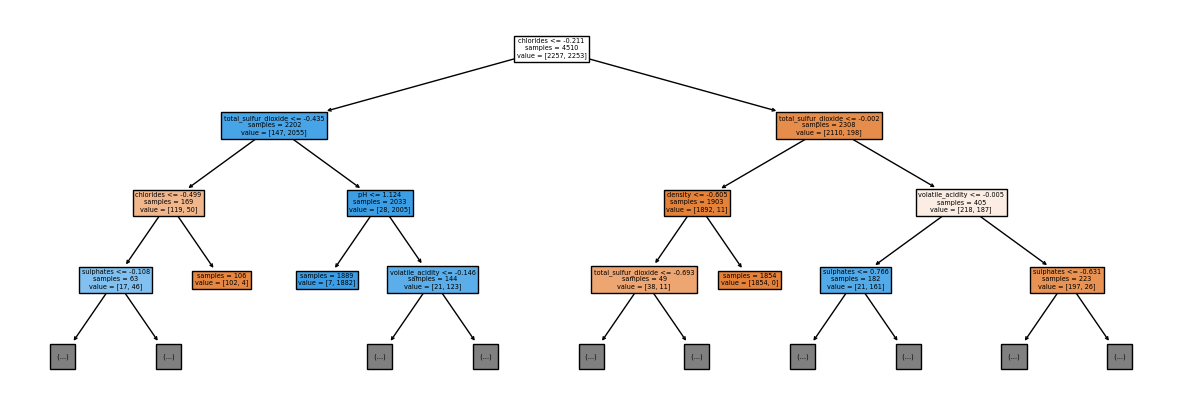

In [113]:
# tree = DecisionTreeClassifier(max_depth = 3, min_samples_split = 150)
# tree.fit(X, y)
# plt.figure(figsize = (15, 5))
# plot_tree(tree, filled=True, proportion = False, impurity = False, feature_names=list(X_tr.columns))
# plt.show();

plt.figure(figsize = (15, 5))
plot_tree(grid.best_estimator_, max_depth = 3, filled=True,
          proportion = False, impurity = False, feature_names=list(X_tr.columns))
plt.show();

In [114]:
# ROC score
roc_auc_score(y_ts, dtc_y_pred)

0.9829293593630527

In [115]:
# MATRIZ CONFUSÃO
dtc_confusion_matrix = confusion_matrix(y_ts, dtc_y_pred)
dtc_confusion_matrix

array([[945,  20],
       [ 13, 956]], dtype=int64)

In [116]:
# ACURÁCIA
dtc_acuracia = accuracy_score(y_ts, dtc_y_pred)
print("Acurácia:", dtc_acuracia)

Acurácia: 0.9829369183040331


In [117]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
dtc_recall = recall_score(y_ts, dtc_y_pred)
print("dtc_recall:", dtc_recall)

dtc_recall: 0.9865841073271414


In [118]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
dtc_precision = precision_score(y_ts, dtc_y_pred)
print("precision_score:", dtc_precision)

precision_score: 0.9795081967213115


In [119]:
print(classification_report(y_ts, dtc_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       965
           1       0.98      0.99      0.98       969

    accuracy                           0.98      1934
   macro avg       0.98      0.98      0.98      1934
weighted avg       0.98      0.98      0.98      1934



In [120]:
dtc_f1_score = f1_score(y_ts, dtc_y_pred)
dtc_f1_score

0.9830334190231363

# Testar o modelo com dados da base df_validation

In [121]:
validation = list(y_val[0:440].values)
# print(validation)

In [122]:
prediction = list(grid.predict(X_val_padronizado[0:440]))
# print(prediction)

In [123]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])    
    display (dfp)
#     display (dfp.prediction.value_counts())
else:
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

seq  validation  prediction
0     7           1           0
1    13           1           0
2    20           1           0
3    36           1           0
4    39           1           0
5    41           1           0
6    54           1           0
7    64           1           0
8    80           1           0
9    84           1           0
10  101           1           0
11  107           1           0
12  108           1           0
13  120           1           0
14  135           1           0
15  142           1           0
16  162           1           0
17  182           1           0
18  184           1           0
19  224           1           0
20  254           1           0
21  295           1           0
22  301           1           0
23  308           1           0
24  319           1           0
25  335           1           0
26  338           1           0
27  363           1           0
28  365           1           0
29  414           1           0
30  435           1           0
31  437           1           0

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Logistic Regression
        </b>
    <br/>&nbsp;
</center>

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [124]:
# Treinar o modelo
lr = LogisticRegression(max_iter =1500)
lr.fit(X_tr, y_tr)

LogisticRegression(max_iter=1500)

In [166]:
# Nos modelos de Classificação com 'Probabilidade' a interpretação corretar é propensão
# Nesse exemplo impresso, a primeira coluna reflete valores com propensão a "0" enquanto que an segunda
# coluna são apresentados valores com propensão a "1"
lr.predict_proba(X_ts).round(4).tolist()[:5]

[[0.0083, 0.9917],
 [0.0029, 0.9971],
 [0.0383, 0.9617],
 [1.0, 0.0],
 [0.0002, 0.9998]]

In [167]:
lr_y_pred = lr.predict(X_ts)

In [170]:
# Valores finais de predição do modelo "lr"
lr_y_pred.tolist()[:5]

[1, 1, 1, 0, 1]

In [126]:
# MATRIZ CONFUSÃO
lr_confusion_matrix = confusion_matrix(y_ts, lr_y_pred)
lr_confusion_matrix

array([[959,   6],
       [  6, 963]], dtype=int64)

In [127]:
# ACURÁCIA
lr_acuracia = accuracy_score(y_ts, lr_y_pred)
print("Acurácia:", lr_acuracia)

Acurácia: 0.9937952430196484


In [128]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
lr_recall = recall_score(y_ts, lr_y_pred)
print("lr_recall:", lr_recall)

lr_recall: 0.9938080495356038


In [129]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
lr_precision = precision_score(y_ts, lr_y_pred)
print("precision_score:", lr_precision)

precision_score: 0.9938080495356038


In [130]:
print(classification_report(y_ts, lr_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.99      0.99      0.99       969

    accuracy                           0.99      1934
   macro avg       0.99      0.99      0.99      1934
weighted avg       0.99      0.99      0.99      1934



In [131]:
lr_f1_score = f1_score(y_ts, lr_y_pred)
lr_f1_score

0.9938080495356038

In [132]:
prediction = list(lr.predict(X_ts[400:410]))
print(prediction)

[1, 1, 1, 1, 0, 0, 1, 0, 0, 0]


<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Random Forest Classifier
        </b>
    <br/>&nbsp;
</center>

[Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [133]:
rf = RandomForestClassifier(n_estimators=1_000, max_depth=8, n_jobs=-1)
rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=8, n_estimators=1000, n_jobs=-1)

In [134]:
rf_y_pred = lr.predict(X_ts)

In [135]:
# MATRIZ CONFUSÃO
rf_confusion_matrix = confusion_matrix(y_ts, rf_y_pred)
rf_confusion_matrix

array([[959,   6],
       [  6, 963]], dtype=int64)

In [136]:
# ACURÁCIA
rf_acuracia = accuracy_score(y_ts, rf_y_pred)
print("Acurácia:", rf_acuracia)

Acurácia: 0.9937952430196484


In [137]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
rf_recall = recall_score(y_ts, rf_y_pred)
print("rf_recall:", rf_recall)

rf_recall: 0.9938080495356038


In [138]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
rf_precision = precision_score(y_ts, rf_y_pred)
print("precision_score:", rf_precision)

precision_score: 0.9938080495356038


In [139]:
print(classification_report(y_ts, rf_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.99      0.99      0.99       969

    accuracy                           0.99      1934
   macro avg       0.99      0.99      0.99      1934
weighted avg       0.99      0.99      0.99      1934



In [140]:
rf_f1_score = f1_score(y_ts, lr_y_pred)
rf_f1_score

0.9938080495356038

<a name="rna"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Multi-layer Perceptron (MLP)
        </b>
    <br/>&nbsp;    
</center>

<div style="overflow: auto;">
    <div style="float: left;">
        <a href="https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification">
            Consultar documentação "Multi-layer Perceptron (MLP)"
        </a>
    </div>
    <div style="float: right;">
        <a href="#índice">
            Índice deste notebook
        </a>
    </div>
</div>

In [141]:
params = {
    'hidden_layer_sizes': [(100,), (70,100), (100,70), (100,70,30) ],
    'learning_rate_init': np.logspace(-5,-1,10,base=10),
    'alpha': np.logspace(-7,-3,10,base=10),
}
mlpc = GridSearchCV(
    MLPClassifier(
        activation='relu',
        solver='adam',
        batch_size=256,        
        early_stopping=True,
    ),
    params,
    cv=3,
    scoring='roc_auc',
    verbose=10,
    n_jobs=3,
)
mlpc.fit(X_tr,y_tr)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3, estimator=MLPClassifier(batch_size=256, early_stopping=True),
             n_jobs=3,
             param_grid={'alpha': array([1.00000000e-07, 2.78255940e-07, 7.74263683e-07, 2.15443469e-06,
       5.99484250e-06, 1.66810054e-05, 4.64158883e-05, 1.29154967e-04,
       3.59381366e-04, 1.00000000e-03]),
                         'hidden_layer_sizes': [(100,), (70, 100), (100, 70),
                                                (100, 70, 30)],
                         'learning_rate_init': array([1.00000000e-05, 2.78255940e-05, 7.74263683e-05, 2.15443469e-04,
       5.99484250e-04, 1.66810054e-03, 4.64158883e-03, 1.29154967e-02,
       3.59381366e-02, 1.00000000e-01])},
             scoring='roc_auc', verbose=10)

In [142]:
mlpc_y_pred = mlpc.predict(X_ts)
mlpc_y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [143]:
# MATRIZ CONFUSÃO
mlpc_confusion_matrix = confusion_matrix(y_ts, mlpc_y_pred)
mlpc_confusion_matrix

array([[960,   5],
       [  6, 963]], dtype=int64)

In [144]:
# ACURÁCIA
mlpc_acuracia = accuracy_score(y_ts, mlpc_y_pred)
print("Acurácia:", mlpc_acuracia)

Acurácia: 0.9943123061013444


In [145]:
# RECALL (SENSIBILIDADE)
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
mlpc_recall = recall_score(y_ts, mlpc_y_pred)
print("mlpc_recall:", mlpc_recall)

mlpc_recall: 0.9938080495356038


In [146]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
mlpc_precision = precision_score(y_ts, mlpc_y_pred)
print("precision_score:", mlpc_precision)

precision_score: 0.9948347107438017


In [147]:
mlpc_f1_score = f1_score(y_ts, mlpc_y_pred)
mlpc_f1_score

0.9943211151264844

In [148]:
etc_f1_score > mlpc_f1_score

True

In [149]:
mlpc.best_params_

{'alpha': 0.00012915496650148828,
 'hidden_layer_sizes': (100, 70, 30),
 'learning_rate_init': 0.03593813663804626}

In [150]:
roc_auc_score(y_ts, mlpc.predict_proba(X_ts)[:,1])

0.9997882545437047

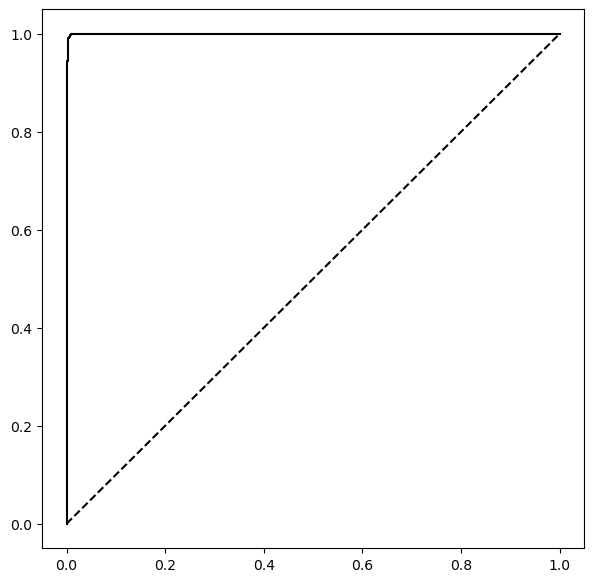

In [151]:
fpr, tpr, ths = roc_curve(y_ts, mlpc.predict_proba(X_ts)[:,1])
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr,'k-')
plt.plot((0,1),(0,1),'k--');

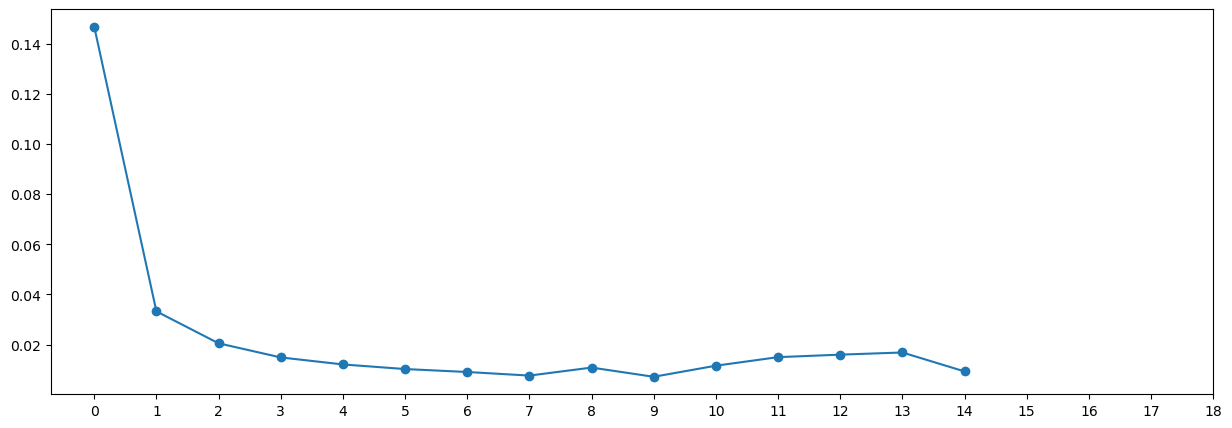

In [152]:
loss = mlpc.best_estimator_.loss_curve_
plt.figure(figsize=(15,5))
plt.plot(loss, 'o-')
plt.xticks(np.arange(19));

In [153]:
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [154]:
prediction = list(mlpc.predict(X_val_padronizado[start:end]))
# print(prediction)

In [155]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

1462 registros lidos
---
65 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    61
1     4
Name: count, dtype: int64
---


seq  validation  prediction
60  1314           1           0
61  1333           1           0
62  1412           1           0
63  1442           1           0
64  1461           1           0

In [156]:
# MATRIZ CONFUSÃO - df Validação
mlpc_y_pred_val = mlpc.predict(X_val_padronizado)
confusion_matrix(y_val, mlpc_y_pred_val)

array([[ 372,    4],
       [  61, 1025]], dtype=int64)

<a name="rna"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            TensorFlow
        </b>
    <br/>&nbsp;    
</center>

In [157]:
# ESTUDAR ESSE MODELO COM MAIS ATENÇÃO!
# VERIFICAR OS PARAMETROS
# TESTAR A BASE COM O PRÉPROESSAMENTO DO KERAS

# Criando o modelo da rede neural
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_tr.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
model.fit(X_tr, y_tr, epochs=10, batch_size=32, validation_data=(X_ts, y_ts))



Epoch 1/10


141/141 [==============================] - 3s 4ms/step - loss: 0.1034 - accuracy: 0.9796 - val_loss: 0.0341 - val_accuracy: 0.9907
Epoch 2/10
141/141 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9942 - val_loss: 0.0259 - val_accuracy: 0.9938
Epoch 3/10
141/141 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9953 - val_loss: 0.0239 - val_accuracy: 0.9933
Epoch 4/10
141/141 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9965 - val_loss: 0.0210 - val_accuracy: 0.9933
Epoch 5/10
141/141 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9967 - val_loss: 0.0195 - val_accuracy: 0.9943
Epoch 6/10
141/141 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0227 - val_accuracy: 0.9948
Epoch 7/10
141/141 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9976 - val_loss: 0.0169 - val_accuracy: 0.9948
Ep

In [158]:
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [159]:
probabilidades = model.predict(X_val_padronizado[start:end])

# Definindo um limiar
limiar = 0.5

# Convertendo probabilidades em rótulos (0 ou 1) com base no limiar
prediction = [1 if prob >= limiar else 0 for prob in probabilidades]

# print(prediction)

46/46 [==============================] - 0s 748us/step


In [160]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

1462 registros lidos
---
33 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    29
1     4
Name: count, dtype: int64
---


seq  validation  prediction
28  1265           1           0
29  1298           1           0
30  1299           0           1
31  1304           1           0
32  1442           1           0

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Combinação de Modelos
        </b>
    <br/>&nbsp;
</center>

In [172]:
validacao = RepeatedKFold(n_splits = 10, n_repeats = 3)
model = [('LogisticRegression', rf), ('KNeighborsClassifier', neigh), ('ExtraTreesClassifier', etc)]
combined_model = VotingClassifier(model, voting = 'hard')
medidas = cross_validate(combined_model, X_tr, y_tr, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9958

In [182]:
combined_model.fit(X_tr, y_tr)

VotingClassifier(estimators=[('Reg. Log.',
                              RandomForestClassifier(max_depth=8,
                                                     n_estimators=1000,
                                                     n_jobs=-1)),
                             ('KNN',
                              GridSearchCV(cv=10,
                                           estimator=KNeighborsClassifier(),
                                           param_grid={'n_neighbors': array([3, 5, 7, 9])},
                                           scoring='roc_auc')),
                             ('Árvore',
                              ExtraTreesClassifier(max_depth=10,
                                                   n_estimators=500,
                                                   n_jobs=-1))])

In [183]:
validation[:20]

[1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1]

In [188]:
prediction = list(combined_model.predict(X_val_padronizado[start:end]))
# print(prediction)

In [190]:
prediction[:20]

[1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1]

In [191]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    print('---')
    display(dfp.tail())
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

1462 registros lidos
---
40 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    35
1     5
Name: count, dtype: int64
---


seq  validation  prediction
35  1299           0           1
36  1301           1           0
37  1304           1           0
38  1417           1           0
39  1442           1           0

In [192]:
# MATRIZ CONFUSÃO - df Validação
combined_model_y_pred_val = combined_model.predict(X_val_padronizado)
confusion_matrix(y_val, combined_model_y_pred_val)

array([[ 371,    5],
       [  35, 1051]], dtype=int64)

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Métricas - modelos de classificação
        </b>
    <br/>&nbsp;
</center>

In [161]:
# data frame modelos
dfm = {
    'modelo':['Extra Trees Classifier', 'KNeighbors Classifier', 'Decision Tree Classifier',
              'Logistic Regression', 'Random Forest Classifier', 'Neural Network MLPC'],
    'accuracy':[etc_acuracia,neigh_acuracia,dtc_acuracia,lr_acuracia, rf_acuracia, mlpc_acuracia],
    'recall':[etc_recall,neigh_recall,dtc_recall, lr_recall, rf_recall, mlpc_recall],
    'precision':[etc_precision,neigh_precision,dtc_precision, lr_precision, rf_precision, mlpc_precision],
    'f1_score':[etc_f1_score,neigh_f1_score,dtc_f1_score,lr_f1_score, rf_f1_score, mlpc_f1_score]
    }    
modelos = pd.DataFrame(dfm)
modelos.style.highlight_max(subset=list(modelos.columns.drop('modelo')))